# qDESS T2 mapping script using DOSMA
###### Author: Zimu Huo
###### Date: 03.2022

See the DOSMA documentation, this is only a partice example


In [1]:
import numpy as np
import dosma as dm
from matplotlib import pyplot as plt
import os
import sigpy as sp
from dosma import preferences
from dosma.scan_sequences import QDess, CubeQuant, Cones
from dosma.tissues import FemoralCartilage
from dosma.models import IWOAIOAIUnet2DNormalized

220427-17:40:58,388 nipype.utils WARNING:
	 A newer version (1.7.1) of nipy/nipype is available. You are using 1.7.0


In [13]:
def dosma_qDessT2mapping(filepath, tissuetype, lowerBound = 0, upperBound = 80):
    '''
    -------------------------------------------------------------------------
    Parameters
    
    filepath: string
    filepath for the dicom files to be segemented
    
    tissue: string 
    only four tissues are currently supported by dicom 
     "fc", "pc", "tc", "men"
            1. Femoral cartilage (fc)
            2. Tibial cartilage (tc)
            3. Patellar cartilage (pc)
            4. Meniscus (men)
    
    lowerBound: scalar
    lower bound for the t2 mapping
    
    
    upperBound: scalar
    upper bound for the t2 mapping
    
    -------------------------------------------------------------------------
    Returns
    t2map : array-like
    t2 map
    
    -------------------------------------------------------------------------
    Notes: 
    See the DOSMA documentation, this is only a partice example 
    
    -------------------------------------------------------------------------
    References
    
    [1] 
    Author: Desai, Arjun D et al.
    Title: DOSMA: A deep-learning, open-source framework for musculoskeletal MRI analysis.
    Link: https://dosma.readthedocs.io/en/latest/introduction.html
    
    [2] 
    Author: B Sveinsson et al. 
    Title: A Simple Analytic Method for Estimating T2 in the Knee from DESS
    Link: https://www.ncbi.nlm.nih.gov/pubmed/28017730
    
    PS: If I'm not crazy, DOSMA qDESS T2 mapping used same algorithm as qDESS_T2.ipynb
    So idealy, they should display the same result, unless I'm missing something 
    '''
    try:
        eval(tissuetype)()
    except KeyError:
        raise ValueError('invalid input')
    fc = eval(tissuetype)()
    qdess = QDess.from_dicom(filepath, verbose=True)
    t2map = qdess.generate_t2_map(fc, suppress_fat=True, suppress_fluid=True)
    t2map.volumetric_map = np.clip(t2map.volumetric_map, lowerBound, upperBound)
    return t2map.volumetric_map.A

In [16]:
filepath = "../lib/resource/data//T2mapping/t2Knee"
tissuetype = "FemoralCartilage"
t2map = dosma_qDessT2mapping(filepath, tissuetype)

  0%|          | 0/160 [00:00<?, ?it/s]

In [17]:
t2map.shape

(512, 512, 80)

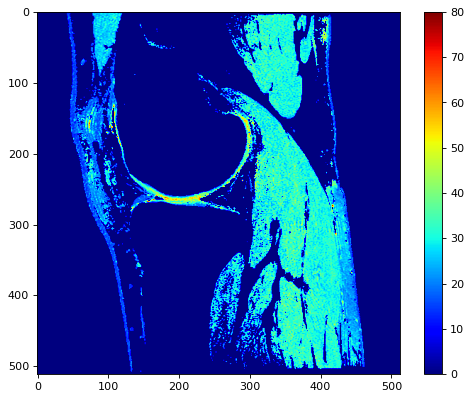

In [15]:
# Clip the estimated T2 values between [0, 80]
plt.figure(figsize=(8, 6), dpi=80)
plt.imshow(t2map[:, :, 34],cmap='jet')
plt.colorbar()